На 8 уроке мы строили графики приведенных ниже данных.
Для какого графика можно использовать модель линейной регрессии?
x = np.array([10,8, 13, 9,11,14, 6,4,12, 7,5])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68 ])

x= np.array([ 10,8, 13, 9,11,14, 6,4,12, 7,5 ])
y2 = np.array([ 9.14, 8.14, 8.74,8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x= np.array([ 10,8, 13, 9,11,14, 6,4,12, 7,5 ])
y3 = np.array([7.46,6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25,12.5, 5.56, 7.91, 6.89])

x0= np.array([ 10, 8, 13, 9, 11, 14, 6, 4, 12, 7,5, 15, 16, 18 ])
y0 = np.array([ 9.14, 8.14, 8.74,8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74, 6.5, 5, 2.9])

In [15]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [47]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
print(x) 
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68 ])

[10  8 13  9 11 14  6  4 12  7  5]


In [49]:
x0 = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x0, y)
print(model.intercept_, x0 * model.coef_[0])

3.0000909090909094 [[5.00090909]
 [4.00072727]
 [6.50118182]
 [4.50081818]
 [5.501     ]
 [7.00127273]
 [3.00054545]
 [2.00036364]
 [6.00109091]
 [3.50063636]
 [2.50045455]]


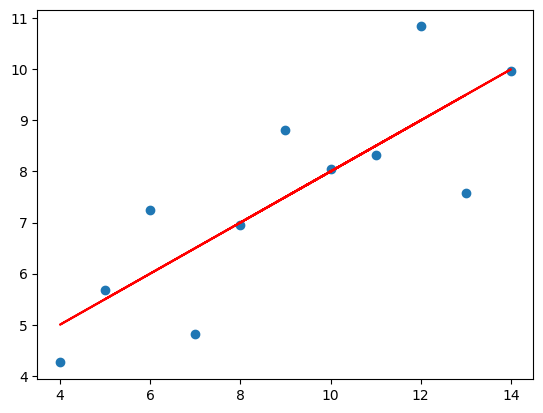

In [50]:
plt.plot(x0, x0 * model.coef_[0] + model.intercept_, color = 'red')

plt.scatter(x0, y)
plt.show()

In [62]:
print(model.score(x0, y))            # коэф. детерминации R**2 -> 0.666

0.6665424595087748


Проверяем условие применимости методов:
1) Смотрим отклонение предсказанныых значений отнеосительно фактических. Находим y c крышкой

In [51]:
x1 = x
z = x1 * model.coef_[0] + model.intercept_         # X умножаем на бэта1 + бэта0
print(z)

[ 8.001       7.00081818  9.50127273  7.50090909  8.50109091 10.00136364
  6.00063636  5.00045455  9.00118182  6.50072727  5.50054545]


In [52]:
e = y - z   # находим остатки
print(e)

[ 0.039      -0.05081818 -1.92127273  1.30909091 -0.17109091 -0.04136364
  1.23936364 -0.74045455  1.83881818 -1.68072727  0.17945455]


Проверяем на случайность. Смотрим график

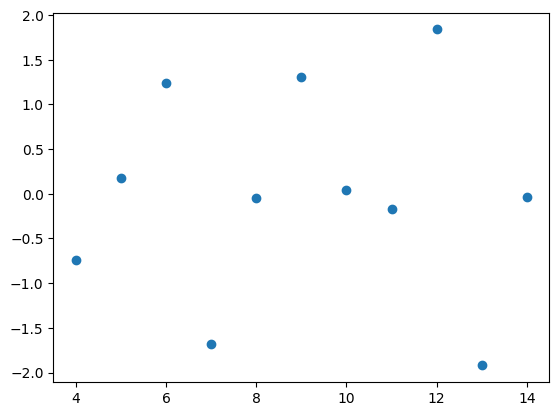

In [53]:
plt.scatter(x, e)
plt.show()                  # остатки случайны

Проверка на нормальность

In [54]:
print(stats.shapiro(e))         # -> статистика 0.942 - pvalue 0,55: остатки имеют нормальное распределение

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)


Проверка на гомоскедатичность. Смторим график остатков относительно оцененных данных.

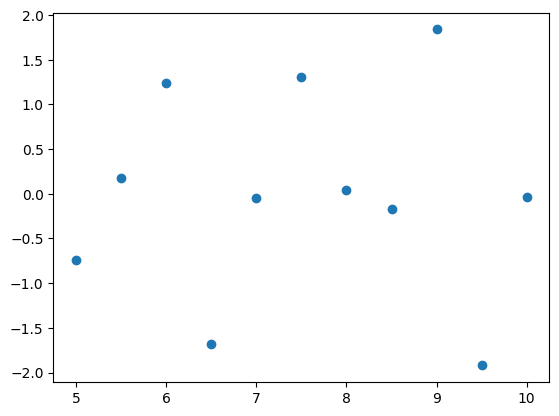

In [55]:
plt.scatter(z, e)
plt.show()              # дисперсия постоянно лежит в диапазоне от -2 до 2. Постоянство дисперсии есть!

Находим значимость модели. Критерий Фишера (имеет только правостороннюю критическую область)

In [57]:
n = len(x)  # кол-во наблюдений
m = 1           # кол-во признаков

k1 = m          # параметры
k2 = n - m - 1

print(k1, k2)

1 9


In [58]:
alpha = 0.05                                # уровень значимости
t = stats.f.ppf(1 - alpha, k1, k2)          # находим квантиль для распределения фишера для правосторонней области (1 - alpha)
print(t)

5.117355029199227


Находим наблюдаемое значение

In [63]:
x2 = x.reshape(-1, 1)
r_sq = model.score(x2, y)
R2 = r_sq
F = (R2 / k1) / ((1 - R2) / k2)
print(F)                            # -> 17.99 принимаем альтернативную гипотезу что коэффициенты значимы. Н0 (коэф. регресии - r**2 = 0) отвергаем. Модель значимая

17.98994296767696


ЛИСТИНГ МОДЕЛИ:

In [67]:
import statsmodels.api as sm# оцениваем моедль с помощью метода fit
x = sm.add_constant(x)          # постройка модели с константой (столбец из единиц)
model = sm.OLS(y, x)            # строим модель. OLS - метод наименьших квадратов
result = model.fit()            # оцениваем моедль с помощью метода fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 23 Mar 2023   Prob (F-statistic):            0.00217
Time:                        00:07:40   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

c:\Users\Makc\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
